> Recurrent neural networks (RNNs), a class of nets that can
predict the future

# Recurrent Neurons and Layers

A recurrent neural network looks very much like a feedforward neural network, except it also has connections pointing backward

Let’s look at the simplest possible RNN, composed of one neuron receiving **inputs,** producing an **output**, and sending that **output back to itself,** as shown in Figure 15-1 (left)

At each time step t (also called a frame), this recurrent neuron **receives** the inputs **$x_{(t)}$** as well as its own **output** from the **previous time step, $y_{t-1}$**. At each time step t (also called a frame), this recurrent neuron receives the inputs

We can represent this tiny network against the time axis, as shown in Figure 15-1 (right). This is called **unrolling the network through time**

<p align='center'>
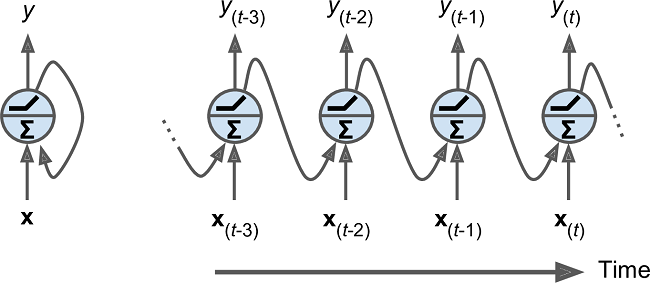
</p>
Figure 15-1. A recurrent neuron (left) unrolled through time (right)

At each time step t, **every neuron receives both the input vector $x_{(t)}$ and the output vector from the previous time step $y_{t-1}$,** as shown in Figure 15-2

Note that both the inputs and outputs are vectors now (when there was just a single neuron, the output was a scalar)

<p align='center'>
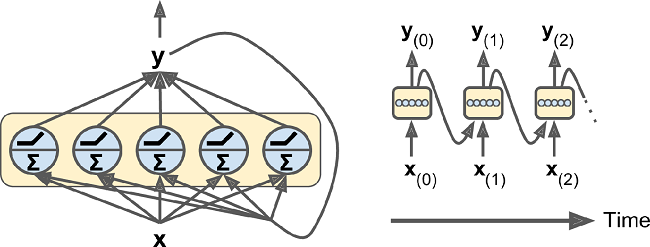
</p>
Figure 15-2. A layer of recurrent neurons (left) unrolled through time (right)

**Each recurrent neuron has two sets of weights:** one for the **inputs $x_{(t)}$** and the other for the **outputs of the previous time step, $y_{(t-1)}$**. Let’s call these weight vectors $w_x$ and $w_y$

If we consider the **whole recurrent layer** instead of just one recurrent neuron, we can place all the **weight vectors in two weight matrices, $W_x$ and $W_y$**

The output vector of the whole recurrent layer can then be computed pretty much as you might expect, as shown in Equation 15-1 (b is the bias vector and $Φ(.)$ is the activation function)

Equation 15-1. Output of a recurrent layer for a single instance

$$y_{(t)} = \phi({W_x}^T x_{(t)} + {W_y}^T y_{(t-1)} + b) $$

Just as with feedforward neural networks, we can compute a recurrent layer’s output in one shot for a whole **mini-batch** by placing all the inputs at time step t in an input matrix $X_{(t)}$ (see Equation 15-2)

Equation 15-2. Outputs of a layer of recurrent neurons for all instances in a mini-batch
<p align='center'>
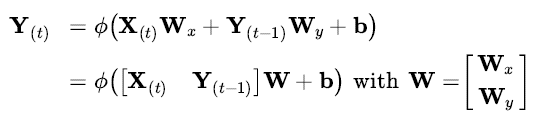
</p>

In this equation:

* $Y_{(t)}$ is an **$m \times n_{\text{neurons}}$ matrix** containing the layer's outputs at time step t for each instance in the **mini-batch** (m is the number of instances in the mini-batch and $n_{\text{neurons}}$ is the number of neurons)

* $X_{(t)}$ is an $m \times n_{\text{inputs}}$ matrix containing the **inputs for all instances** ($n_{\text{inputs}}$ is the number of input features)

* $W_x$ is an $n_{\text{inputs}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the inputs of the current time step**

* $W_y$ is an $n_{\text{neurons}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the outputs of the previous time step**

* $b$ is a vector of size $n_{\text{neurons}} containing **each neuron's bias term**

* The weight matrices **$W_x$ and $W_y$** are often concatenated vertically into a **single weight matrix W** of shape $(n_{\text{inputs}} + n_{\text{neurons}}) \times n_{\text{neurons}}$ (see the second line of Equation 15-2)

* The notation $[X_{(t)} Y_{(t-1)}]$ represents the horizontal concatenation of the matrices 

Notice that $Y_{(t)}$ is a function of $X_{(t)}$ and $Y_{(t-1)}$, which is a function of $X_{(t-1)}$ and $Y_{(t-2)}$, which is a function of $X_{(t-2)}$ and $Y_{(t-3)}$, and so on

This makes $Y_{(t)}$ a function of all the inputs since time t = 0 (that is, $X_{(0)}, X_{(1)}, \dots, X_{(t)}$

At the first time step, t = 0, there are no previous outpus, so they are typically assumed to be all zeros

## Memory Cells

**Since the output of a recurrent neuron at time step t is a function of all the inputs from previous time steps, you could say it has a form of memory**

A **part** of a neural network that **preserves some state across time steps** is called a **memory cell** (or simply a cell). A **single recurrent neuron,** or a layer of recurrent neurons, **is a very basic cell,** capable of learning only **short patterns** (typically about 10 steps long)

In general a cell’s state at time step t, denoted **$h_{(t)}$** (the "h" stands for "hidden"), is a **function of some inputs at that time step and its state at the previous time step:** $h_{(t)} = f(h_{(t-1)}, x_{(t)})$

Its output at time step t, denoted $y_{(t)}$, is also a function of the previous state and the current inputs. In the case of the basic cells we have discussed so far, the output is simply equal to the state, but in more complex cells this is not always the case, as shown in Figure 15-3 

<p align='center'>
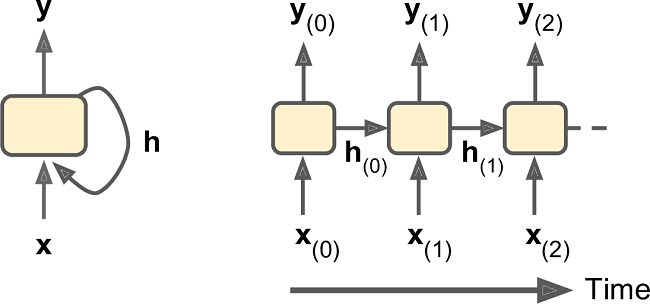
</p>
Figure 15-3. A cell’s hidden state and its output may be different

## Input and Output Sequences

An RNN can **simultaneously take a sequence of inputs and produce a sequence of outputs** (see the top-left network in Figure 15-4)

This type of **sequence-to-sequence network** is useful for **predicting time series** such as stock prices: you feed it the prices over the last N days, and it must output the prices shifted by one day into the future (i.e., from N – 1 days ago to tomorrow)

Alternatively, you could feed the network a sequence of inputs and **ignore all outputs except for the last one** (see the top-right network in Figure 15- 4). In other words, this is a **sequence-to-vector network**

For example, you could feed the network a sequence of words corresponding to a movie review, and the network would output a sentiment score (e.g., from –1 [hate] to +1 [love])

Conversely, you could **feed the network the same input vector over and over again at each time step** and let it **output a sequence** (see the bottom left network of Figure 15-4). This is a **vector-to-sequence network**. For example, the input could be an image (or the output of a CNN), and the output could be a caption for that image

Lastly, you could have a **sequence-to-vector network, called an encoder, followed by** a **vector-to-sequence network, called a decoder** (see the bottom-right network of Figure 15-4)

For example, this could be used for translating a sentence from one language to another. You would feed the network a sentence in one language, the encoder would convert this sentence into a single vector representation, and then the decoder would decode this vector into a sentence in another language

This two-step model, called an **Encoder–Decoder,** works much better than trying to translate **on the fly** with a single sequence-to-sequence RNN (like the one represented at the top left): the last words of a sentence can affect the first words of the translation, so you need to wait until you have seen the whole sentence before translating it

<p align='center'>
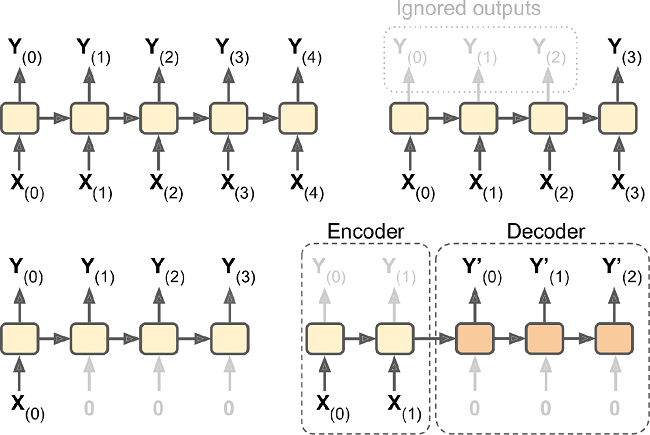
</p>
Figure 15-4. Seq-to-seq (top left), seq-to-vector (top right), vector-to-seq (bottom left), and Encoder–Decoder (bottom right) networks

# Training RNNs

To train an RNN, the trick is **to unroll it through time** and then simply use **regular backpropagation** (see Figure 15-5). This strategy is called **backpropagation through time (BPTT)**

Just like in regular backpropagation, there is a first forward pass through the unrolled network (represented by the dashed arrows). Then the output sequence is evaluated using a cost function $C(Y_{(0)}, Y_{(1)}, \dots Y_{(T)})$ where T is the max time step

Note that this cost function may ignore some outputs, as shown in Figure 15-5 (for example, in a sequence-to-vector RNN, all outputs are ignored except for the very last one). The gradients of that cost function are then propagated backward through the unrolled network (represented by the solid arrows)

Finally the model parameters are updated using the gradients computed during BPTT. Note that the **gradients flow backward through all the outputs used by the cost function,** not just through the final output

For example, in Figure 15-5 the cost function is computed using the last three outputs of the network, $Y_{(2)}, Y_{(3)}, \text{and } Y_{(4)}$, so gradients flow through these three outputs, but not through $Y_{(0)} \text{and } Y_{(1)}$

Moreover, since the same parameters $W$ and $b$ are used at each time step, backpropgation will do the right thing and sum over all time steps

<p align='center'>
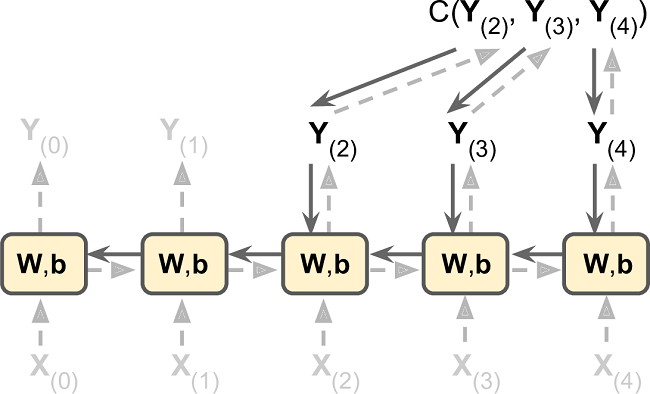
</p>
Figure 15-5. Backpropagation through time

# Forecasting a Time Series

Suppose you are studying the number of active users per hour on your website, or the daily temperature in your city, or your company’s financial health, measured quarterly using multiple metrics. In all these cases, the data will be a sequence of **one or more values per time step.** This is called a **time series**

In the first two examples there is a **single value per time step,** so these are **univariate time series,** while in the financial example there are **multiple values per time step** (e.g., the company’s revenue, debt, and so on), so it is a **multivariate time series**

A typical task is to predict future values, which is called **forecasting.** Another common task is to fill in the blanks: to predict (or rather “postdict”) missing values from the past. This is called **imputation**

For example, Figure 15-6 shows 3 univariate time series, each of them 50 time steps long, and the goal here is to forecast the value at the next time step (represented by the X) for each of them

<p align='center'>
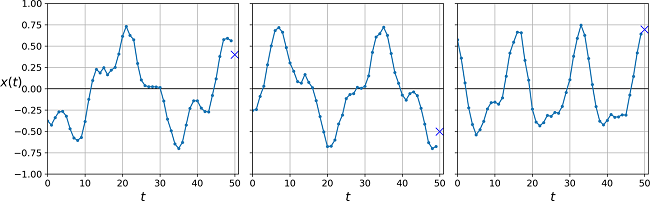
</p>
Figure 15-6. Time series forecasting

For simplicity, we are using a time series generated by the generate_time_series() function, shown here: 

In [4]:
import numpy as np
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

This function creates as many time series as requested (via the batch_size argument), each of length n_steps, and there is just one value per time step in each series (all series are univariate)

The function returns a NumPy array of shape [batch size, time steps, 1], where each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise

When dealing with time series (and other types of sequences such as sentences), the input features are generally represented as 3D arrays of shape **[batch size, time steps, dimensionality],** where dimensionality is 1 for univariate time series and more for multivariate time series.

Now let’s create a training set, a validation set, and a test set using this function:

In [14]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

X_train contains 7,000 time series (i.e., its shape is [7000, 50, 1]), while X_valid contains 2,000 (from the 7,000th time series to the 8,999th) and X_test contains 1,000 (from the 9,000th to the 9,999th)

Since we want to forecast a single value for each series, the targets are column vectors (e.g., y_train has a shape of [7000, 1])

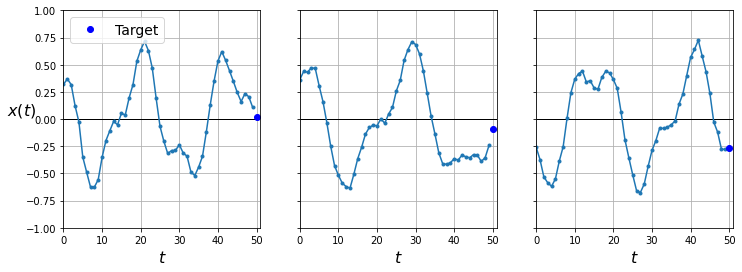

In [16]:
import matplotlib.pyplot as plt
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

## Baseline Metrics

The simplest approach is to **predict the last value in each series.** This is called **naive forecasting,** and it is sometimes surprisingly difficult to outperform. In this case, it gives us a mean squared error of about 0.020:

In [20]:
import tensorflow as tf
from tensorflow import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020002536

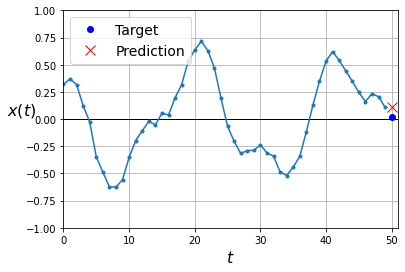

In [21]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

Another simple approach is to use a **fully connected network.** Since it **expects a flat list of features for each input,** we need to add a **Flatten layer.** Let’s just use a simple Linear Regression model so that each prediction will be a linear combination of the values in the time series:

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0977 - val_loss: 0.0387
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0243 - val_loss: 0.0170
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0126
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0105
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0089
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0053

In [24]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0038


0.0038187995087355375